In [ ]:
# https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter08/Chapter%208%20-%20Semantic%20Search.ipynb#scrollTo=uOFFg7YWFoaf

In [1]:
!pip install langchain==0.2.5 faiss-gpu==1.7.2 cohere==5.5.8 langchain-community==0.2.5 rank_bm25==0.2.2 sentence-transformers==3.0.1
!CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python==0.2.78

ERROR: Could not find a version that satisfies the requirement faiss-gpu==1.7.2 (from versions: none)
ERROR: No matching distribution found for faiss-gpu==1.7.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py

In [2]:
!pip install cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 79.7 MB/s eta 0:00:00


In [3]:
api_key = "Yy2TE1sKjwuS5ByVIODhnnFJJ0Mg5JXoDOs9EJ1x"

In [4]:
import cohere

In [7]:
co = cohere.Client(api_key)

In [73]:
text = """
Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.
The screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. It was Lynda Obst's final film as producer before her death. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensive practical and miniature effects, and the company DNEG created additional digital effects.
Interstellar was released in theaters on November 7, 2014. In the United States, it was first released on film stock, expanding to venues using digital projectors. The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014. Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content. He also notes that gravity should have pulled down the ice clouds.[57] Neil deGrasse Tyson, an astrophysicist, explored the science behind the ending of Interstellar, concluding that it is theoretically possible to interact with the past, and that "we don't really know what's in a black hole, so take it and run with it".[58] The theoretical physicist Michio Kaku praised the film for its scientific accuracy and said Interstellar "could set the gold standard for science fiction movies for years to come". Timothy Reyes, a former NASA software engineer, said "Thorne's and Nolan's accounting of black holes and wormholes and the use of gravity is excellent".[59]
"""

In [76]:
sentences = list(map(lambda x: x.strip("\n"), text.split('.')))

In [77]:
len(sentences)

18

In [78]:
response = co.embed(texts=sentences, input_type="search_document")

In [79]:
len(response.embeddings)

18

In [80]:
import numpy as np
embeds = np.array(response.embeddings)
embeds.shape

(18, 4096)

In [49]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 66.3 MB/s eta 0:00:00


In [81]:
import faiss
dim = embeds.shape[1]
index = faiss.IndexFlatL2(dim)
print(index.is_trained)

True


In [82]:
index.add(np.float32(embeds))

In [83]:
query = "how precise was the science in interstellar?"

query_embed = co.embed(texts=[query], input_type="search_query").embeddings[0]

In [84]:
len(query_embed)

4096

In [94]:
distances, sixs = index.search(np.float32([query_embed]), 18)

In [95]:
distances

array([[ 4554.691 ,  6861.379 ,  7041.328 ,  7113.6836,  7281.429 ,
         8442.538 ,  8487.629 ,  8933.393 ,  9867.385 , 10928.126 ,
        11326.638 , 11451.832 , 11760.68  , 11875.822 , 12012.178 ,
        12147.877 , 12530.908 , 14332.841 ]], dtype=float32)

In [86]:
for i, ix in enumerate(sixs[0]):
  print(distances[0][i], sentences[int(ix)])

4554.691 [58] The theoretical physicist Michio Kaku praised the film for its scientific accuracy and said Interstellar "could set the gold standard for science fiction movies for years to come"
6861.379  Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar
7041.328 [57] Neil deGrasse Tyson, an astrophysicist, explored the science behind the ending of Interstellar, concluding that it is theoretically possible to interact with the past, and that "we don't really know what's in a black hole, so take it and run with it"
7113.6836  Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content

<BarContainer object of 18 artists>

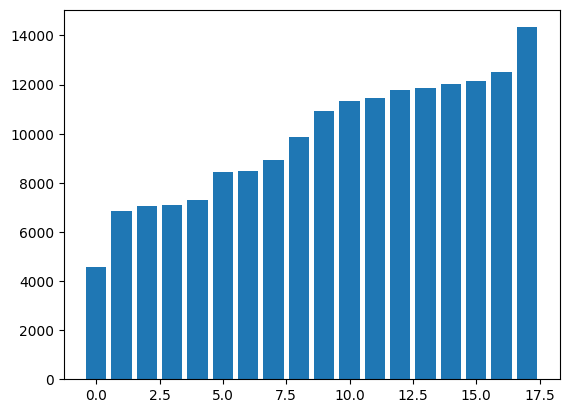

In [96]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(distances[0]))], distances[0])

# Considerations for dense retrieval

## Requirements
1. what if answer is not in the text?
3. both semantic and keyword search if user thinks is a keyword search

## Chuncking
4. what if answer is in multiple sentences?

Different chunking strategies
- sentence/paragraph
- character split (every x characters)
- token split (every x tokens)
- token split with overlapping tokens
- LLM to dynamically split text into meaningful chunks

## Labels
2. track user clik on answer can be use to improve future versions (how)
5. thinking about labels -> we need to know if the user found the answer or not, if I am asking Gemini for instance is unclear whether the answer was helpful or not. Thumbs up and down are a good start.

## Indexing
- indexes like FAISS where they can tradeoff precision for speed, for instance clustering the indexes. But the indexes have to be trained.
- using vector DB allows you to add a new vector without having to rebuild the index

## Fine Tuning
- fine tune embedding for retrieval
- have retrieval queries and fine tune the LLM to optimze for embedding retrieval

> https://www.kaggle.com/competitions/vmware-zero-shot-information-retrieval?utm_source=chatgpt.com

example of informationl retrieval kaggle competition